In [5]:
# Install and import all packages

import piplite
await piplite.install(['openpyxl ==3.0.9'])

In [6]:
import numpy as np
import pandas as pd

In [9]:
from js import fetch
import io

url ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
resp = await fetch(url)
text = io.BytesIO((await resp.arrayBuffer()).to_py())

df_can = pd.read_excel(
    text,
    sheet_name = 'Canada by Citizenship',
    skiprows = range(20),
    skipfooter =2)
print('data downloaded and read into a dataframe')

data downloaded and read into a dataframe


In [13]:
 # take a look at the data set

df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [14]:
print(df_can.shape)


(195, 43)


***start to clean up the data*** 
* change column names, 
* drop columns, 
* align the columns how you would like. Ex: table set by countries

In [15]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis =1 , inplace= True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [17]:
df_can.rename(columns= { 'OdName': 'Country', 'AreaName': 'Continent', 'RegName':'Region'}, inplace = True)
df_can.head()
              

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [24]:
# turen all columns labels to strings
# it returns False because the labels are not all strings 

all(isinstance(column, str) for column in df_can.columns)

False

In [25]:
# Time to change them to strings

df_can.columns = list(map(str, df_can.columns))

In [27]:
# check and validate

all(isinstance(column, str) for column in df_can.columns)

True

In [28]:
### Set the country name as index, this help with the .loc method

In [37]:
df_can.set_index('Country', inplace = True)

<class 'KeyError'>: "None of ['Country'] are in the columns"

In [38]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [41]:
# Add a total column to the data frame

df_can['Total'] = df_can.sum(axis = 1)
df_can.head()

<ipython-input-41-ef1bf17b167d>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis = 1)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,175917
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,47097
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,208317
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,18
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,45


In [44]:
print('data dimensions', df_can.shape)

data dimensions (195, 38)


In [50]:
# creating a list of years from 1980-2013
# you will need this when you plot

years = list(map(str, range (1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

## Creating Visualizations with matplotlib

In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline 

mpl.style.use('ggplot')
print('matplotlib version:', mpl.__version__) 

matplotlib version: 3.3.3


***Graphing Area Plots***

In [67]:
df_can.sort_values(['Total'], axis = 0, inplace=True, ascending = False)
df_top5 = df_can.head()

df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


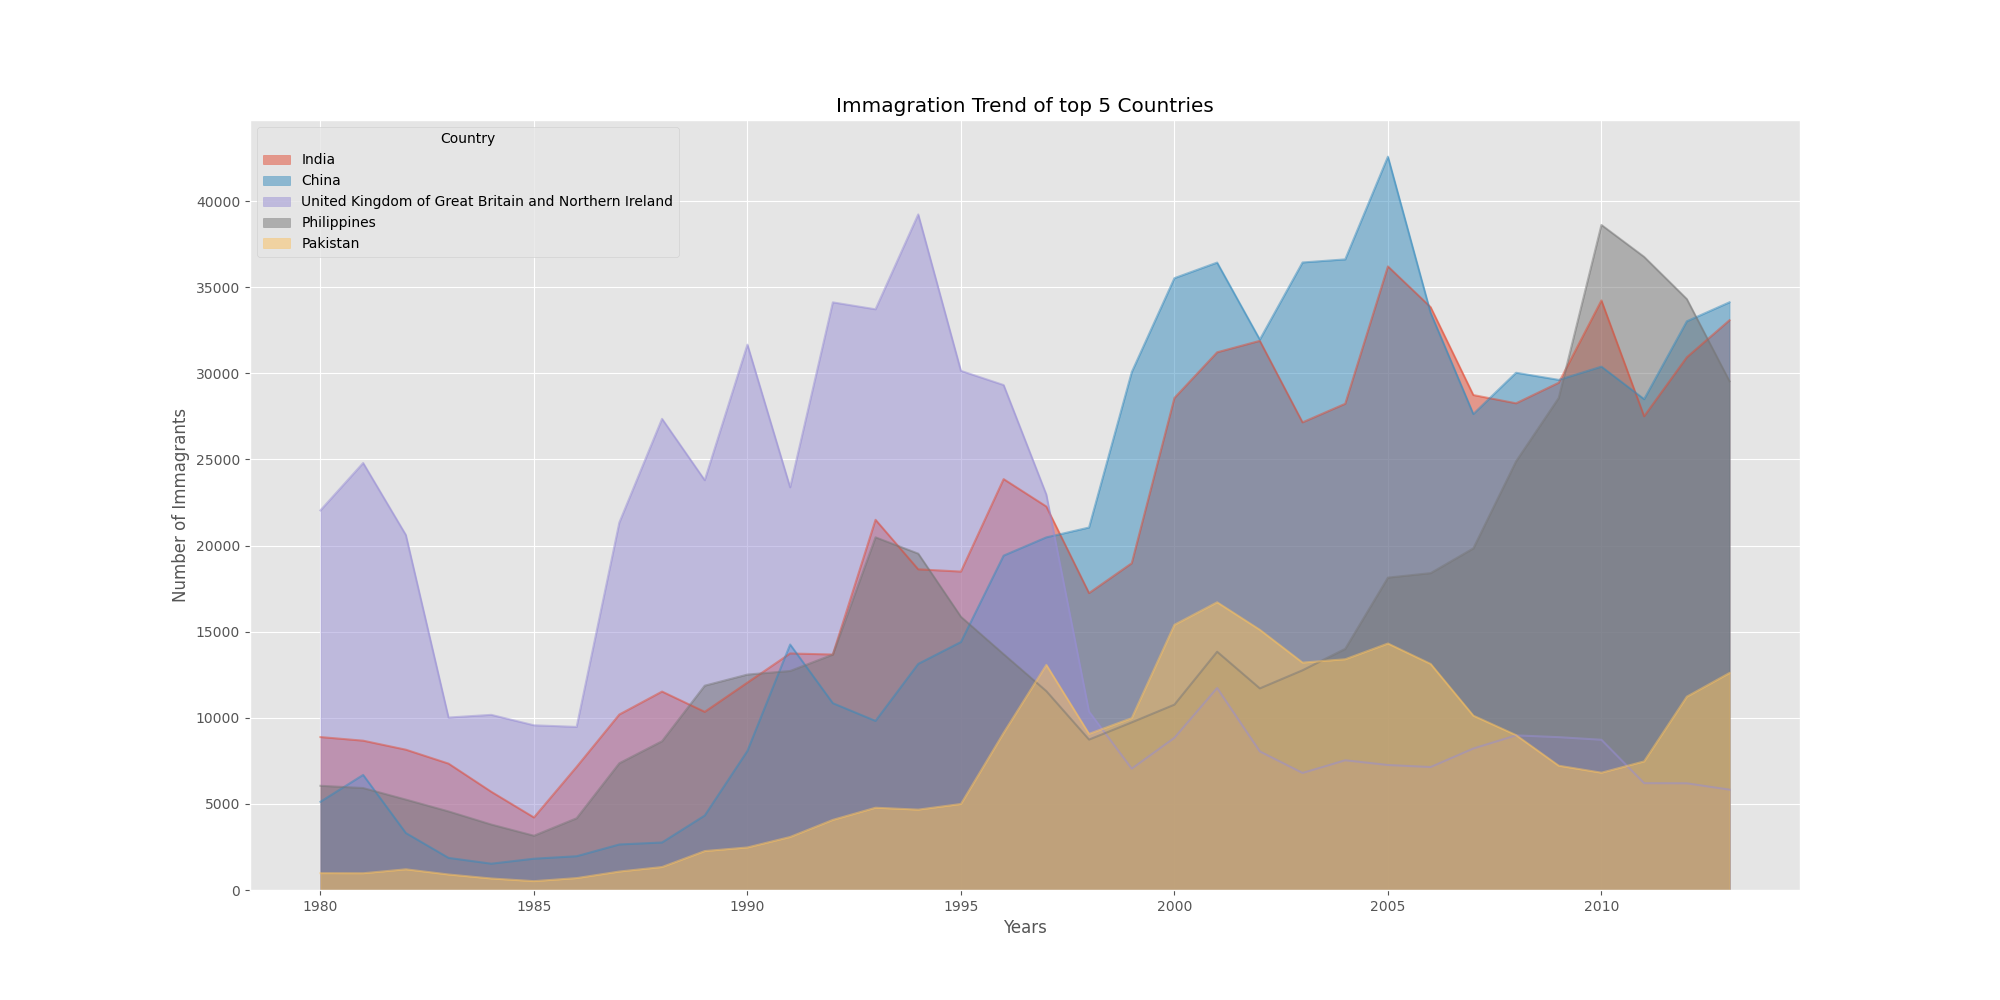

<Figure size 2000x1000 with 0 Axes>

In [86]:
# changing the values within the index to interger for plotting

df_top5.index = df_top5.index.map(int)
df_top5.plot(kind = 'area',
             stacked = False,
             figsize = (20,10)) # passing the tuple (x,y) size

plt.title('Immagration Trend of top 5 Countries')
plt.xlabel('Years')
plt.ylabel('Number of Immagrants')
           
plt.show()

# option 1 plotting using scripting layer

Text(0, 0.5, 'Number of Immagrants')

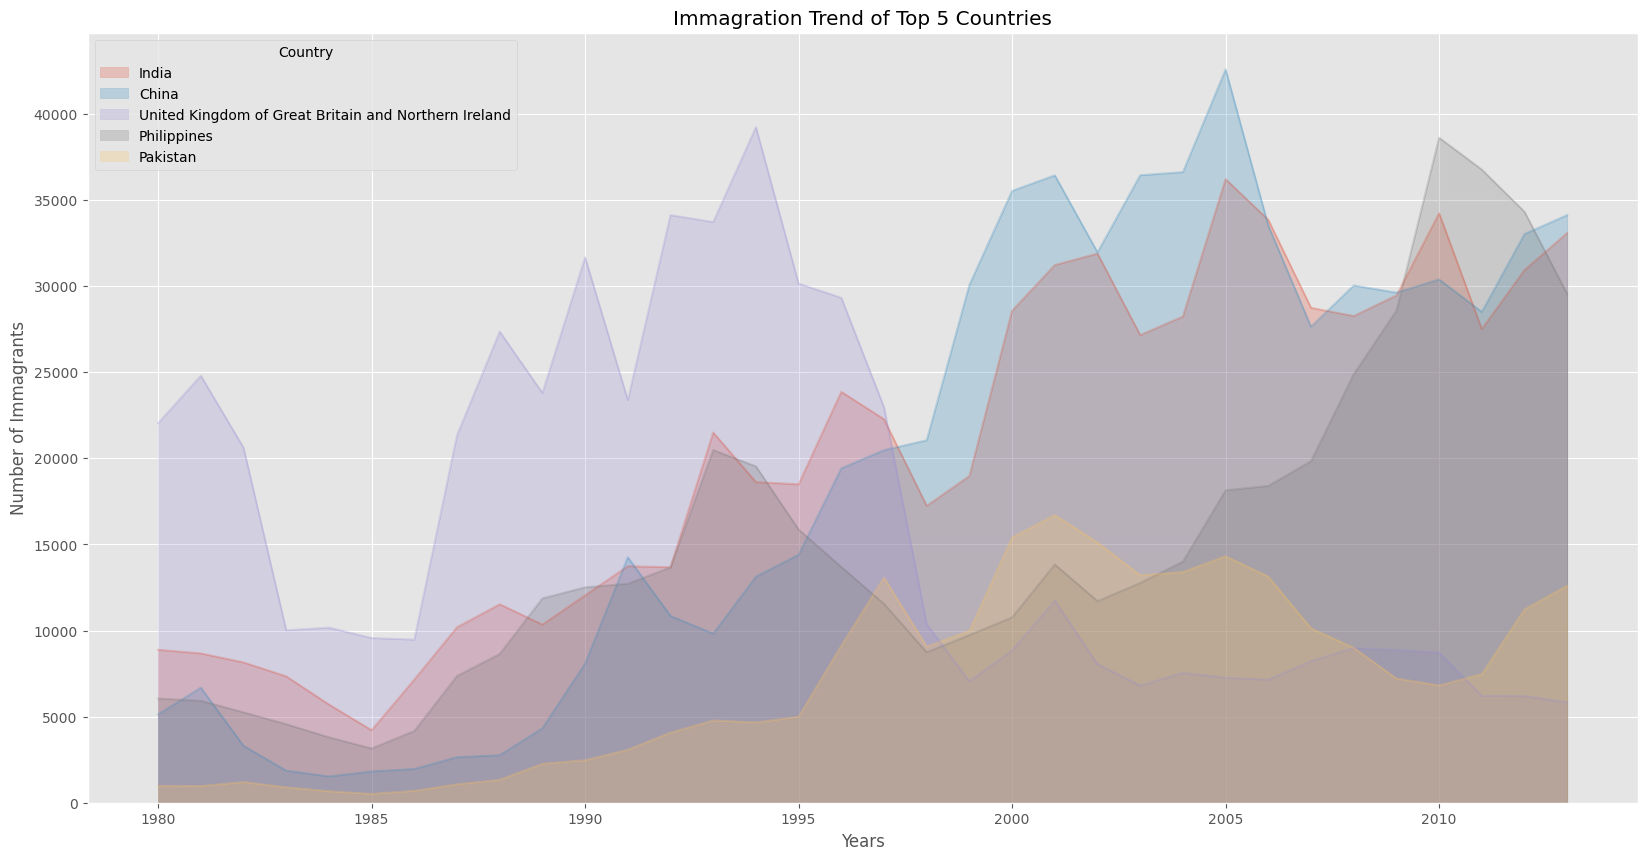

In [87]:
ax = df_top5.plot(kind='area',
             alpha = 0.25,
             stacked = False,
             figsize = (20,10))

ax.set_title('Immagration Trend of Top 5 Countries')
ax.set_xlabel ('Years')
ax.set_ylabel ('Number of Immagrants')

# option #2 plotting with the artist layer
# alpha enlarges the plot map

#two ways to plot with the Artsit layer and scripting 


Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.

Text(0, 0.5, 'number of immagrants')

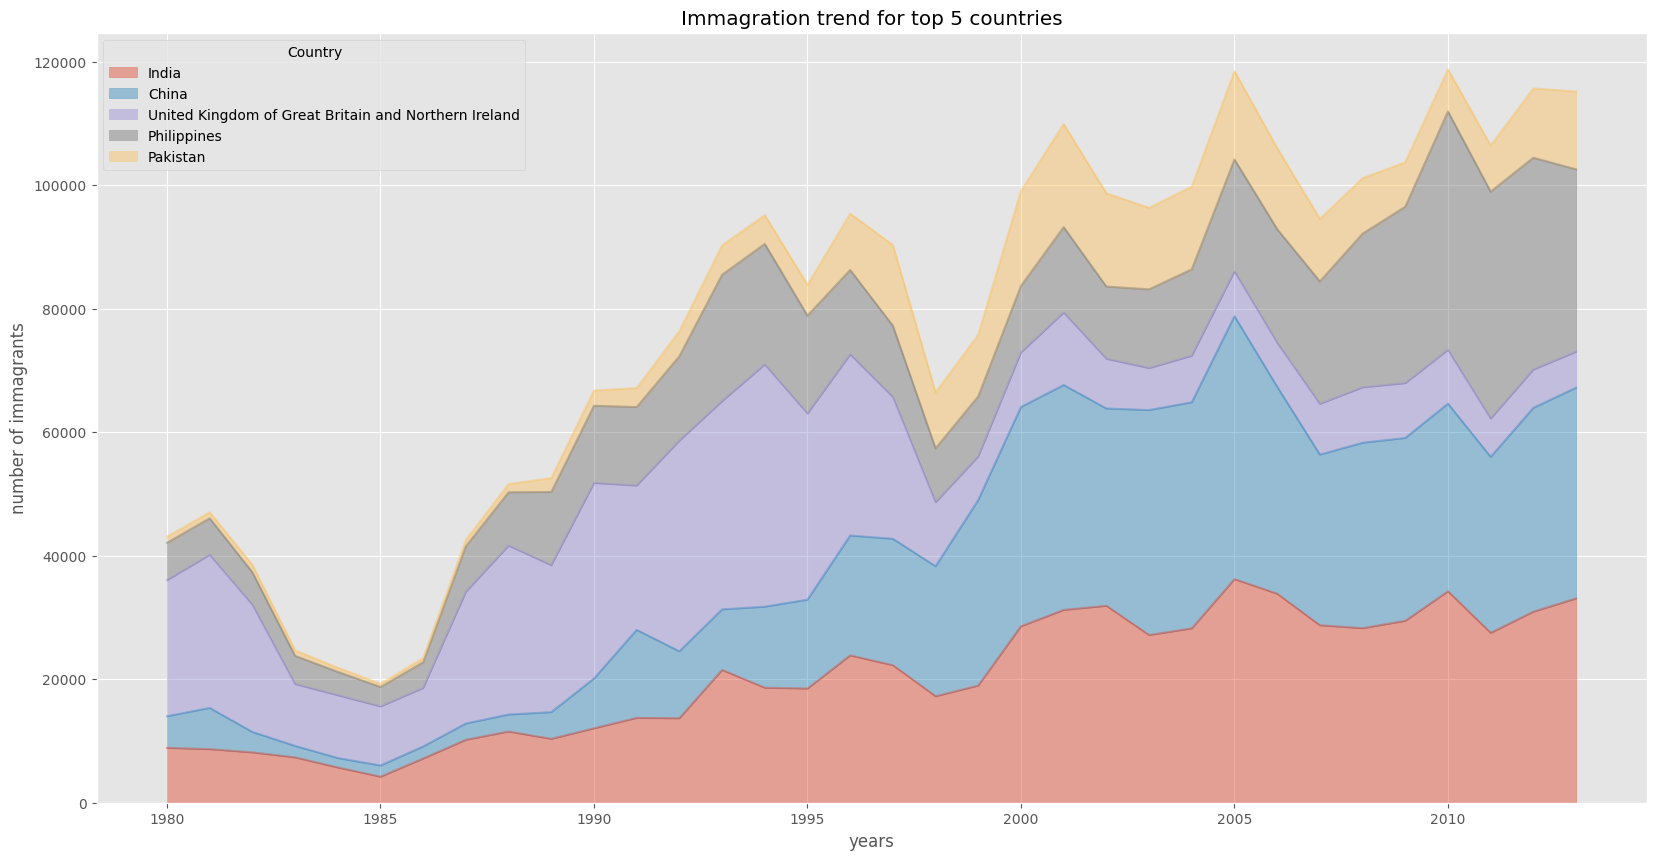

In [88]:
ax = df_top5.plot(kind = 'area', alpha = 0.45, figsize= (20,10))

ax.set_title ('Immagration trend for top 5 countries')
ax.set_xlabel('years')
ax.set_ylabel('number of immagrants')

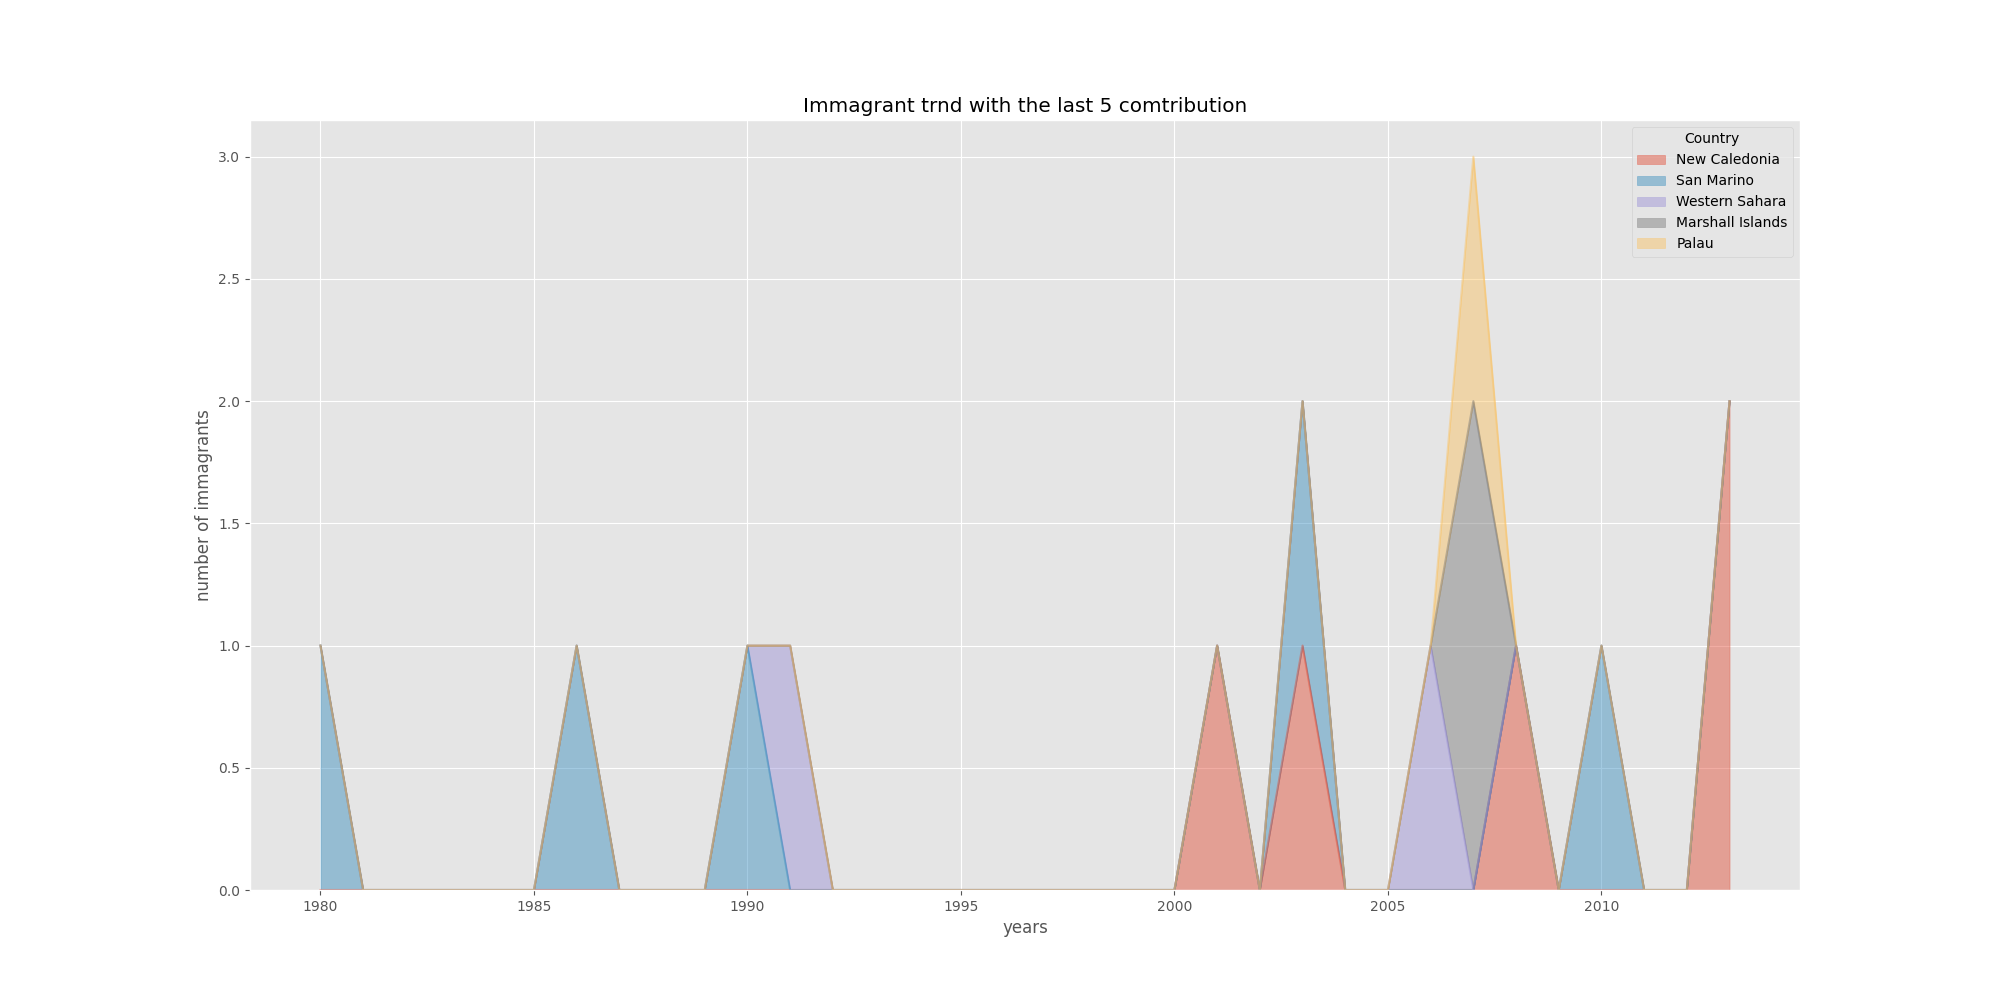

<Figure size 2000x1000 with 0 Axes>

In [89]:
df_last5 = df_can.tail(5)
df_last5 = df_last5[years].transpose()

df_last5.index = df_last5.index.map(int)
df_last5.plot(kind = 'area', alpha = 0.45, figsize=(20,10))
plt.title('Immagrant trnd with the last 5 comtribution')
plt.ylabel('number of immagrants')
plt.xlabel('years')

plt.show()

Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.55.

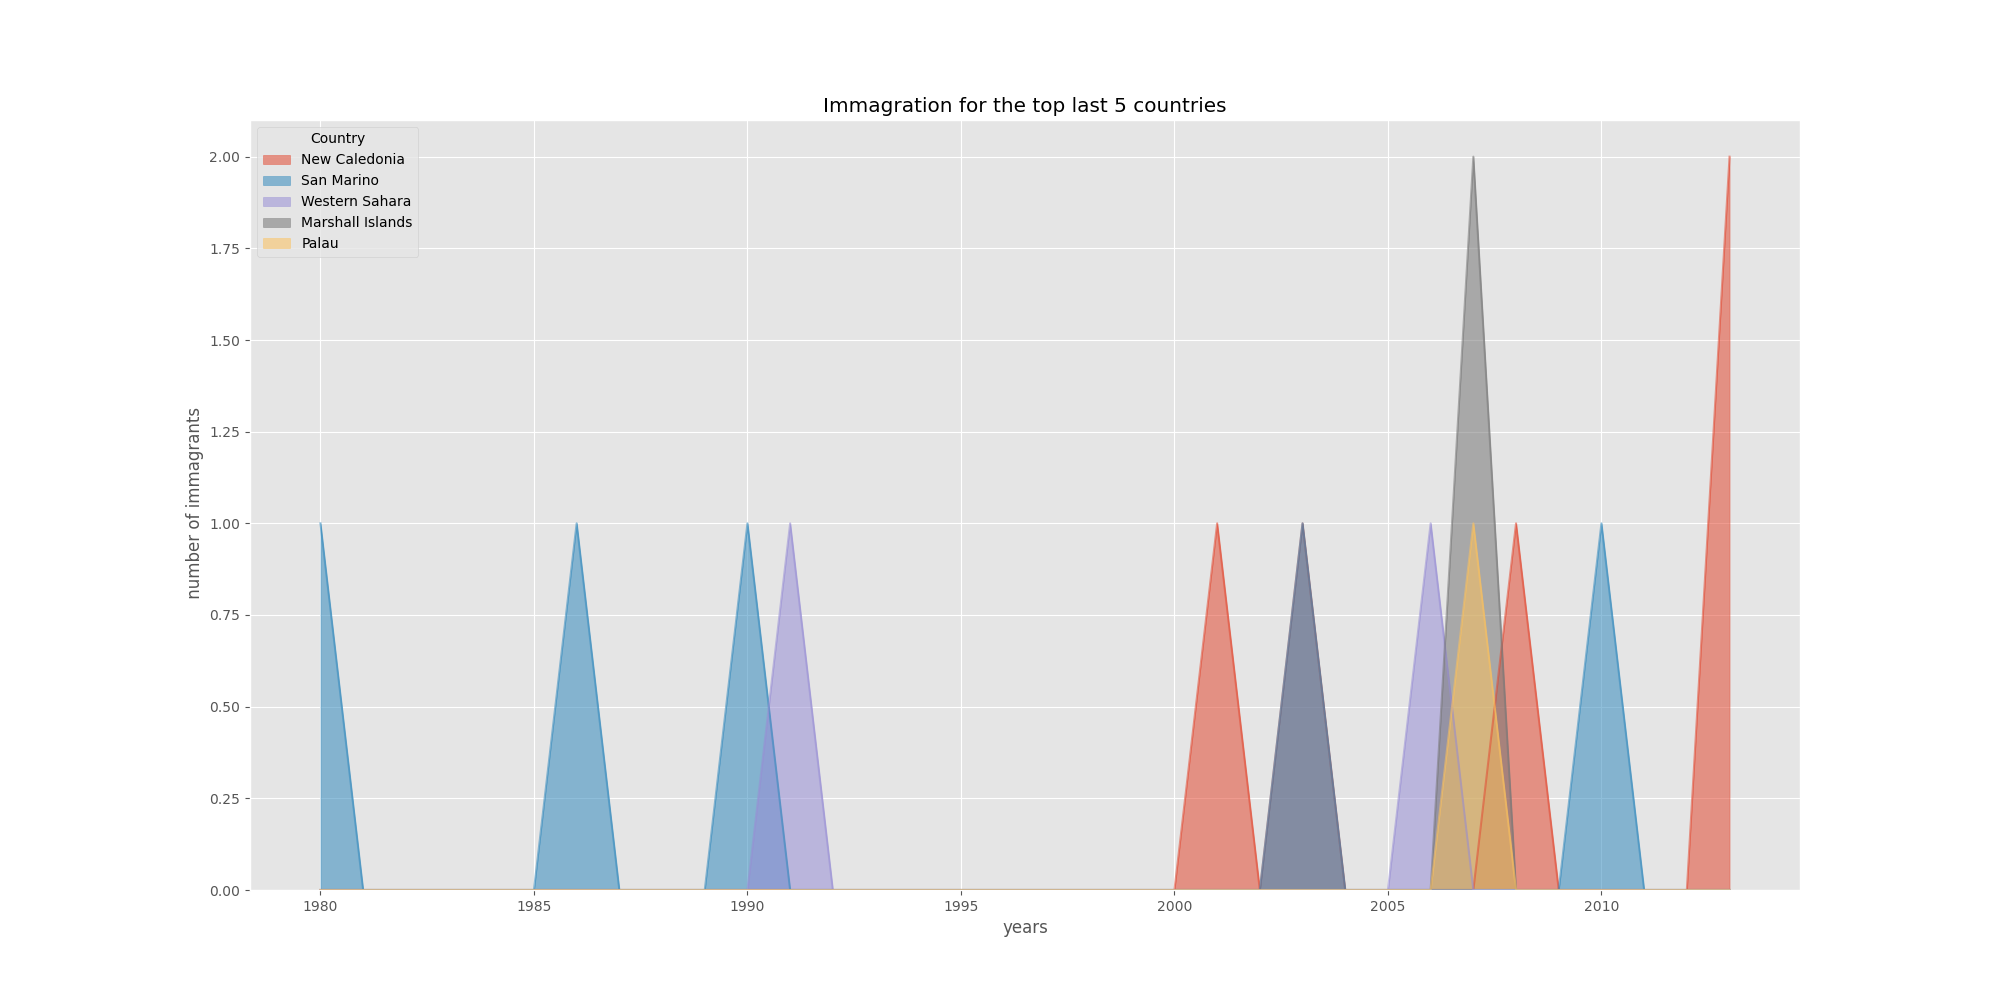

<Figure size 2000x1000 with 0 Axes>

In [94]:
df_last5 = df_can.tail(5)
df_last5 = df_last5[years].transpose()

df_last5.head()

df_last5.index = df_last5.index.map(int)
ax = df_last5.plot(kind= 'area', alpha = 0.55, stacked = False, figsize=(20,10))

ax.set_title('Immagration for the top last 5 countries')
ax.set_xlabel('years')
ax.set_ylabel(' number of immagrants')

plt.show()

## Histograms 

In [95]:
# using a histogram plot the frequency distribution 
# of the number population of new immagrants from the various countries to canada in 2013

# we will need to use NumPy to plot but lets first look at the data split intervals.
# we will have to bin renges and frequency count.

df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [96]:
# np hsitogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count)
print(bin_edges) #bin ranges to default to 10bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


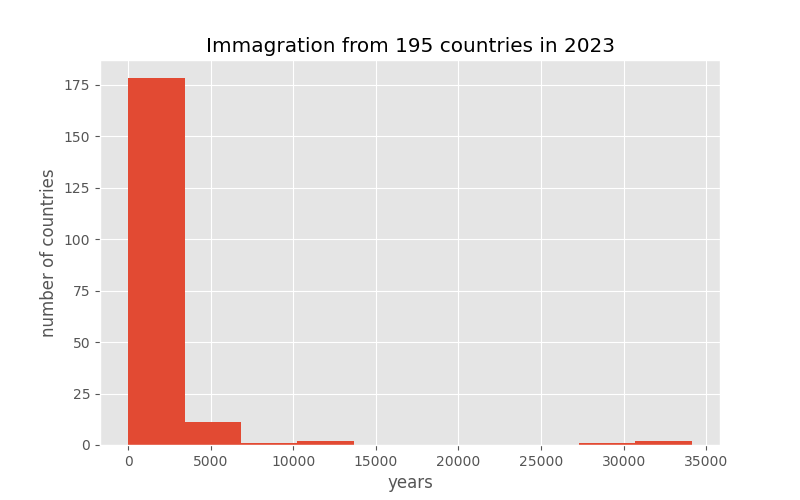

<Figure size 800x500 with 0 Axes>

In [98]:
# plot using the kind like 'hist'

df_can['2013'].plot(kind='hist', figsize = (8,5))

plt.title ('Immagration from 195 countries in 2023')
plt.ylabel('number of countries')
plt.xlabel('years')

plt.show()

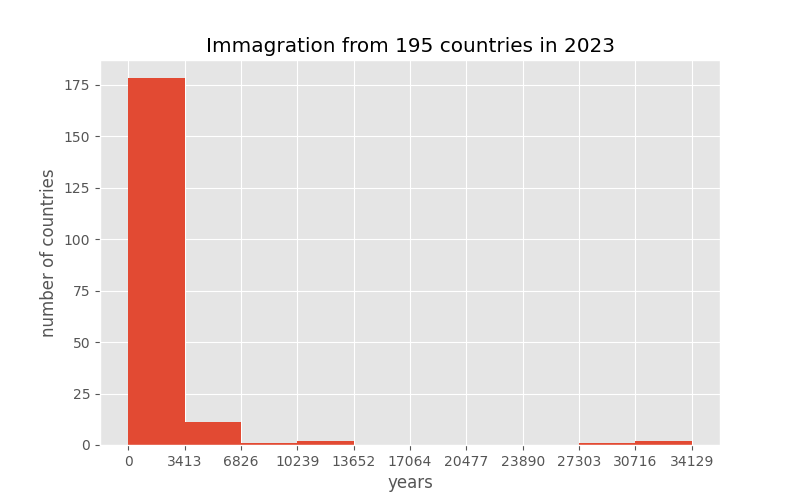

<Figure size 800x500 with 0 Axes>

In [101]:
# we made the bins match up with the frequency now you can see the size,
# frequency for each bin

count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind = 'hist', figsize=(8,5), xticks = bin_edges)
plt.title ('Immagration from 195 countries in 2023')
plt.ylabel('number of countries')
plt.xlabel('years')

plt.show()

What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [102]:
df_can.loc[['Denmark','Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [107]:
# generate a histogram
# transpose the dataframe

df_other = df_can.loc[['Denmark','Norway', 'Sweden'], years].transpose()
df_other.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


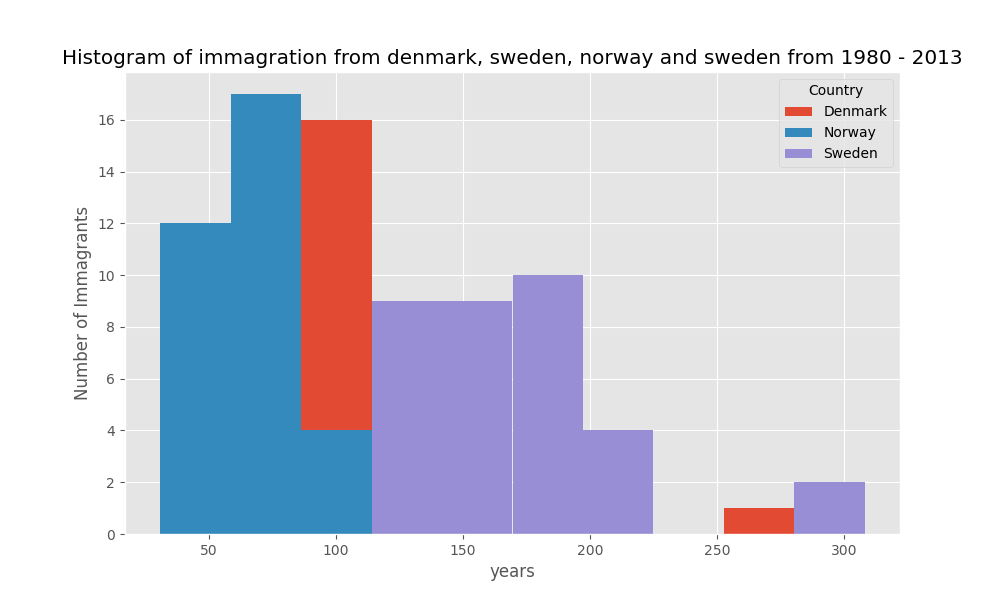

<Figure size 1000x600 with 0 Axes>

In [109]:
df_other.plot(kind ='hist', figsize=(10,6))

plt.title('Histogram of immagration from denmark, sweden, norway and sweden from 1980 - 2013')
plt.xlabel('years')
plt.ylabel('Number of Immagrants')

plt.show()

making modifications to the histogram
* incrase bin size to 15
* set alpha to 60%
* label the x axis by passing xlabel parameter
* change the colors of the plot os color parameter

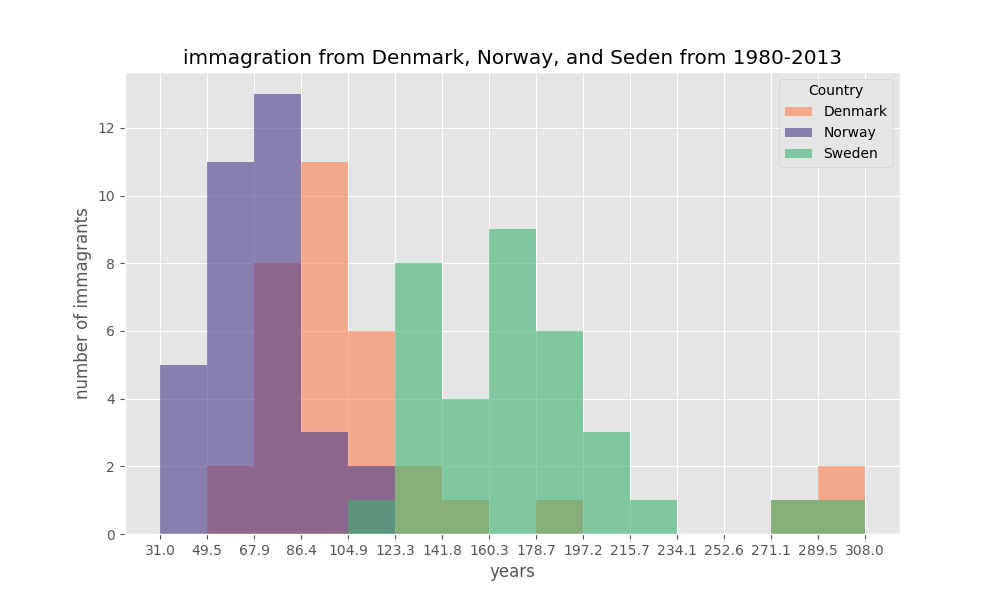

<Figure size 1000x600 with 0 Axes>

In [114]:
count, bin_edges = np.histogram(df_other,15)

df_other.plot(kind = 'hist',
              figsize = (10,6),
              bins = 15,
              alpha = 0.6,
              xticks = bin_edges,
              color = ['coral', 'darkslateblue', 'mediumseagreen'] )

plt.xlabel('years')
plt.ylabel('number of immagrants')
plt.title('immagration from Denmark, Norway, and Seden from 1980-2013')

plt.show()

In [116]:
# run this code for listing of colors in matplotlib

import matplotlib 
for name, hex in matplotlib.colors.cnames.items():
    print(name,hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


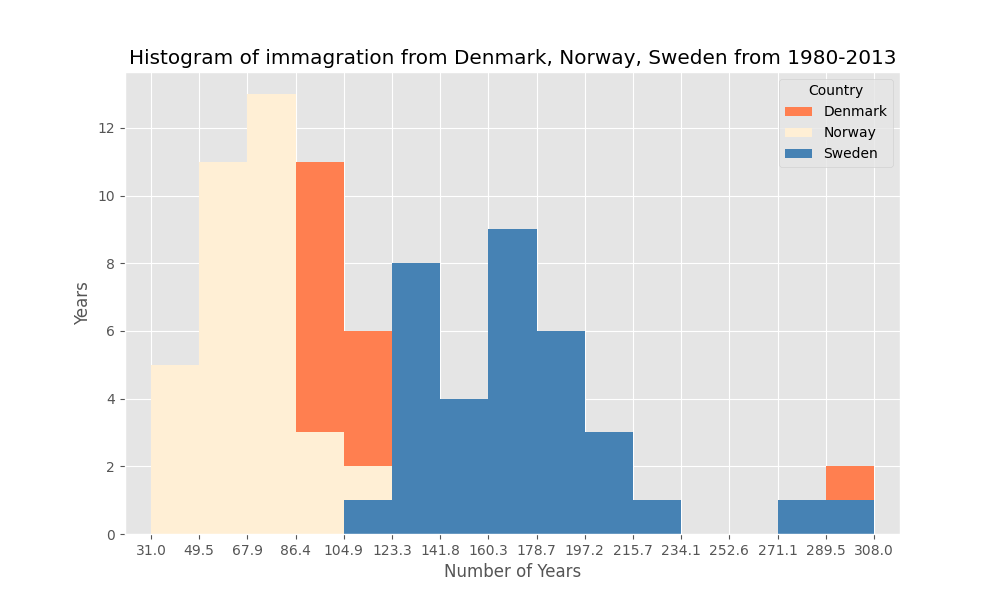

<Figure size 1000x600 with 0 Axes>

In [121]:
# for plots to overlap we can use the stacked parameter
# you an also adjust the min and the max label to removes exta gaps

count, bin_edges = np.histogram(df_other, 15)
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10

df_other.plot (kind = 'hist', 
               figsize = (10, 6),
               bins = 15, 
               xticks = bin_edges,
               color = ['coral', 'papayawhip', 'steelblue'],
               xlim = (xmin, xmax))

plt.title('Histogram of immagration from Denmark, Norway, Sweden from 1980-2013')
plt.xlabel('Number of Years')
plt.ylabel('Years')

plt.show()

Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

In [125]:
df_other = df_can.loc[['Greece', 'Albania', 'Bulgaria'],years]
df_other.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Greece,1065,953,897,633,580,584,547,765,564,773,...,120,100,74,110,107,119,101,102,146,298
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Bulgaria,24,20,12,33,11,24,33,52,43,85,...,2022,1738,1419,1172,994,784,556,365,451,512


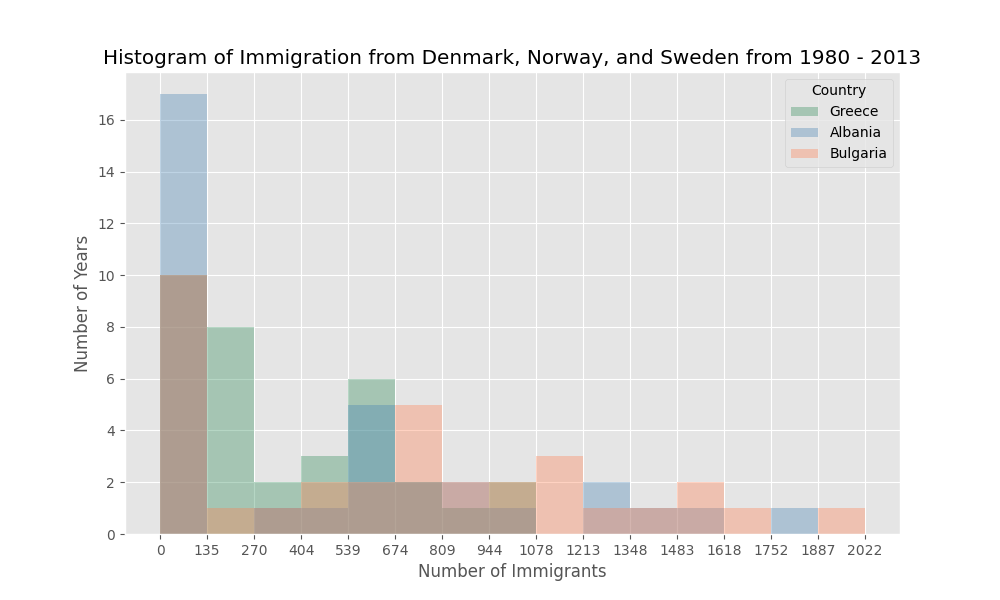

<Figure size 1000x600 with 0 Axes>

In [136]:
sf_other = df_can.loc[['Greece', 'Albania', 'Bulgaria'],years]
df_other.head()

df_other = df_other.transpose()

count, bin_edges = np.histogram(df_other, 15)

df_other.plot(kind = 'hist',
              figsize = (10,6),
              alpha = .35,
              bins = 15,
              xticks = bin_edges,
              color = ['seagreen', 'steelblue', 'coral'])


plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()      

## Bar Graphs

Your are able to use two different types or parameters. kind or plot():

    * kind = bar (vertical)
    * kind = barh (horizontal)

Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [140]:
# get the data 
df_ice = df_can.loc['Iceland', years]
df_ice.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

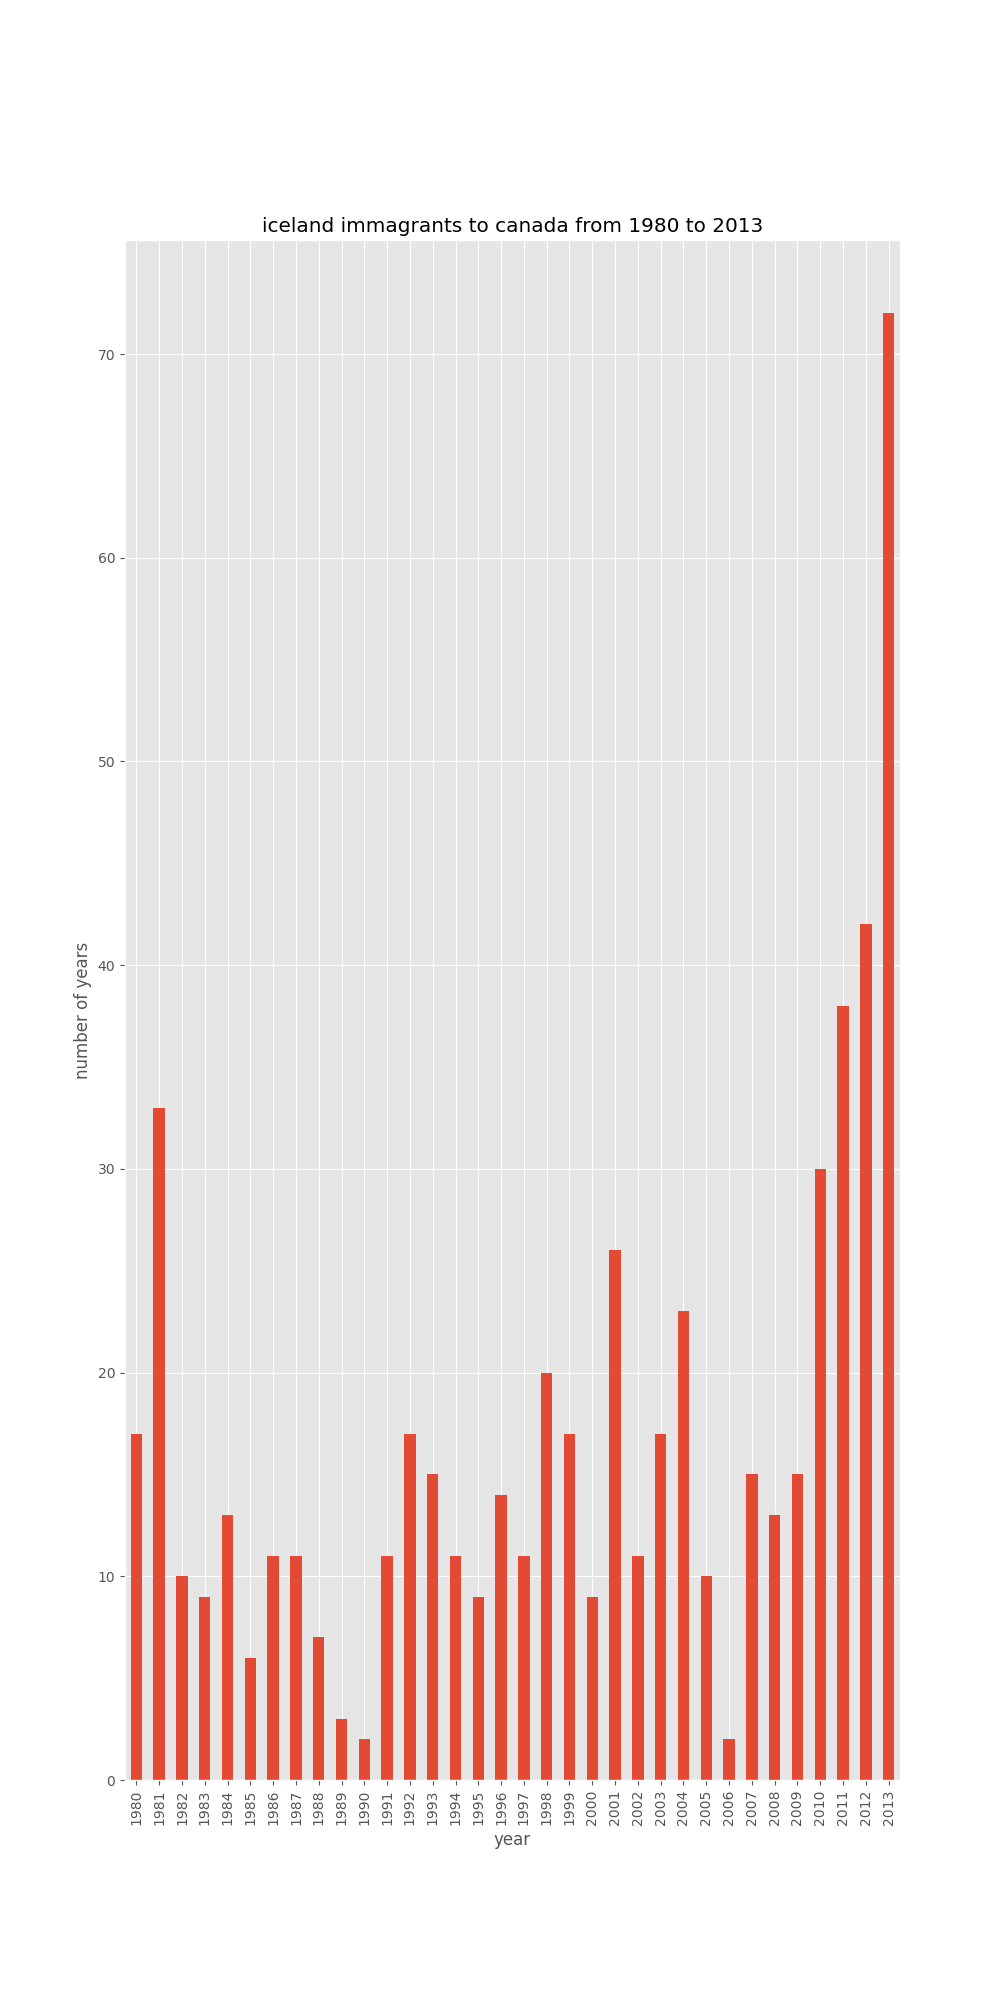

<Figure size 1000x2000 with 0 Axes>

In [144]:
# plot the data
df_ice.plot(kind = 'bar', figsize =(10,20))

plt.xlabel('year')
plt.ylabel('number of years')
plt.title('iceland immagrants to canada from 1980 to 2013')

plt.show()

If you are wanting to add annotates to the graph reference these parameters

* s: str, the text of annotation.
* xy: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
* xytext: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
* xycoords: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
* arrowprops: Takes a dictionary of properties to draw the arrow:
* arrowstyle: Specifies the arrow style, '->' is standard arrow.
* connectionstyle: Specifies the connection type. arc3 is a straight line.
* color: Specifies color of arrow.
* lw: Specifies the line width.

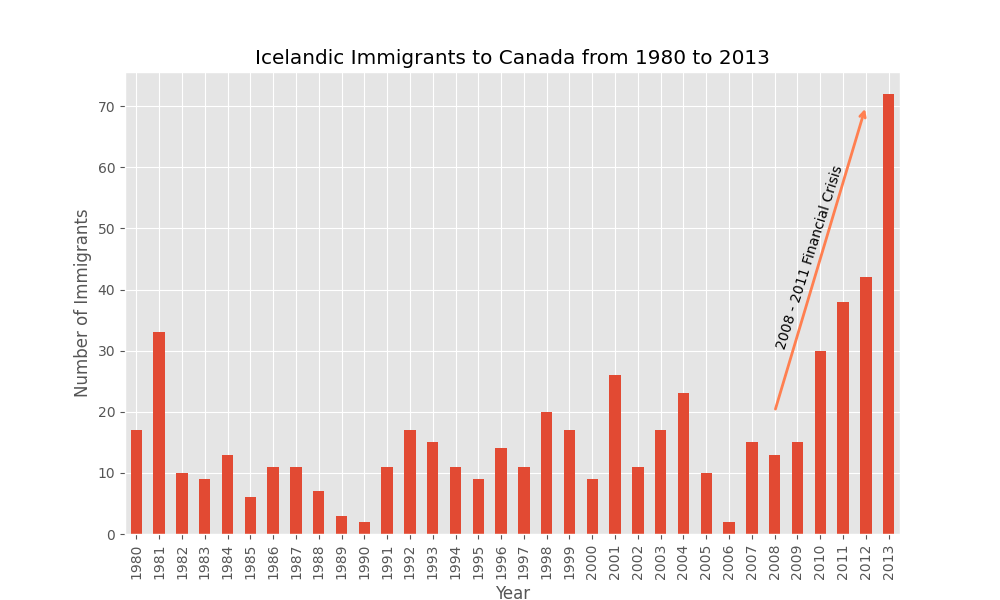

<Figure size 1000x600 with 0 Axes>

In [153]:
df_ice.plot(kind = 'bar', figsize=(10,6))

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')


# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='coral', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

Use the horizontal bar charts is you need room for labeling the bars. When it comes to horizontal graphs the y axis is used for labeling and length of bars in the x-axis corresponds to the magnitude of the variable being measured. 

## Q
Using the scripting later and the df_can dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Text(2028712, 13.9, '2,075,712')

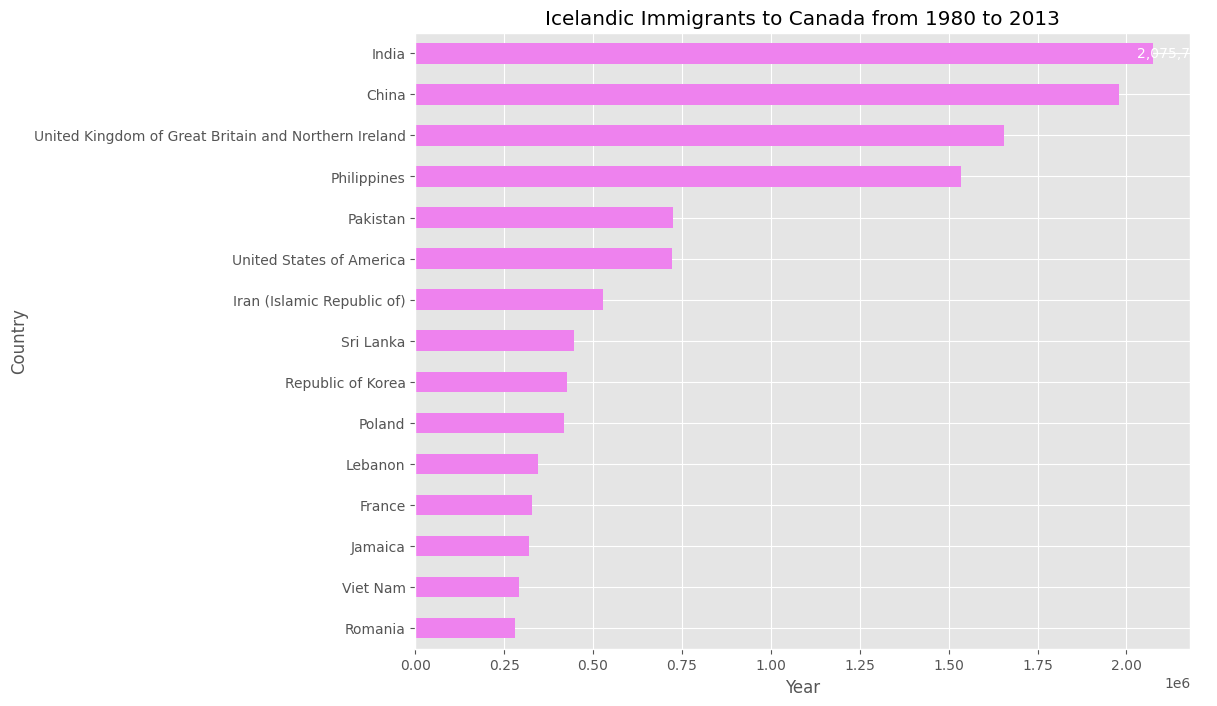

In [163]:
df_can.sort_values(by = 'Total', ascending = True, inplace = True)
df_top15 = df_can['Total'].tail(15)
df_top15

df_top15.plot(kind = 'barh', figsize = (10,8), color = 'violet')
plt.xlabel('Year')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

for index, value in enumerate(df_top15):
    label = format(int(value), ',')

plt.annotate(label, 
             xy= (value - 47000, index - 0.10), 
             color = 'white')